<a href="https://colab.research.google.com/github/daniellgtr/premierLeague/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Centro Universitário IESB


Disciplina: Introdução a Ciência de Dados


Turno: Noturno

DANIEL A G SIQUEIRA - Mat: 2512120051

A análise de dados exploratória do campeonato inglês "Premier League".
* Dataset disponibilizado no site https://www.kaggle.com/datasets/marcohuiii/english-premier-league-epl-match-data-2000-2025



![image.png](https://www.ogol.com.br/img/logos/competicoes/4_imgbank_pl_20250226175331.png)

A Premier League é o nível mais alto da pirâmide do futebol inglês, com 20 times batalhando pela honra de serem coroados campeões ingleses.

Lar de alguns dos clubes, jogadores, treinadores e estádios mais famosos do futebol mundial, a Premier League é a liga mais assistida do planeta, alcançando 920 milhões de lares em 189 países.

A liga acontece entre agosto e maio e envolve os times jogando entre si em casa e fora durante toda a temporada, totalizando 380 partidas.

Três pontos são concedidos por vitória, um ponto por empate e nenhum por derrota, com o time com mais pontos no final da temporada vencendo o título da Premier League.

Os times que terminam entre os três últimos da tabela no final da temporada são rebaixados para a Championship, a segunda divisão do futebol inglês.

Essas equipes são substituídas por três clubes promovidos do Campeonato: os times que terminam em primeiro e segundo lugares e o terceiro nos playoffs de fim de temporada.
Fonte: https://www.premierleague.com/premier-league-explained

In [203]:
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import numpy              as np
from PIL import Image


df = pd.read_csv('https://raw.githubusercontent.com/daniellgtr/premierLeague/refs/heads/main/epl_final.csv')

In [204]:
# @title Conhecendo o DATASET
num_linhas, num_colunas = df.shape
print(f'                            O DataFrame tem {num_linhas} linhas e {num_colunas} colunas.''\n','\n')
print(df.dtypes,'\n','\n')
print("                             DEMONSTRAÇÃO DO DATA SET:\n\n")
df.head(3)


                            O DataFrame tem 9380 linhas e 22 colunas.
 

Season               object
MatchDate            object
HomeTeam             object
AwayTeam             object
FullTimeHomeGoals     int64
FullTimeAwayGoals     int64
FullTimeResult       object
HalfTimeHomeGoals     int64
HalfTimeAwayGoals     int64
HalfTimeResult       object
HomeShots             int64
AwayShots             int64
HomeShotsOnTarget     int64
AwayShotsOnTarget     int64
HomeCorners           int64
AwayCorners           int64
HomeFouls             int64
AwayFouls             int64
HomeYellowCards       int64
AwayYellowCards       int64
HomeRedCards          int64
AwayRedCards          int64
dtype: object 
 

                             DEMONSTRAÇÃO DO DATA SET:




,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0


In [205]:
# @title Preparo prévio do dataset

#Calculo de pontos e listar campeoes
home_safe_PRE = df[['Season', 'HomeTeam']].copy()
away_safe_PRE = df[['Season', 'AwayTeam']].copy()

resultado = {'H': (3, 0), 'A': (0, 3), 'D': (1, 1)}
home_safe_PRE['Points'] = df['FullTimeResult'].map(lambda x: resultado[x][0])
away_safe_PRE['Points'] = df['FullTimeResult'].map(lambda x: resultado[x][1])
home_safe_PRE['GoalsScored'] = df['FullTimeHomeGoals']
home_safe_PRE['GoalsConceded'] = df['FullTimeAwayGoals']
away_safe_PRE['GoalsScored'] = df['FullTimeAwayGoals']
away_safe_PRE['GoalsConceded'] = df['FullTimeHomeGoals']
home_safe_PRE['Loss'] = (df['FullTimeResult'] == 'A').astype(int)
away_safe_PRE['Loss'] = (df['FullTimeResult'] == 'H').astype(int)
home_safe_PRE = home_safe_PRE.rename(columns={'HomeTeam': 'Team'})
away_safe_PRE = away_safe_PRE.rename(columns={'AwayTeam': 'Team'})

consolidar_PRE = pd.concat([home_safe_PRE, away_safe_PRE])

total_games_per_team_PRE = consolidar_PRE.groupby(['Season', 'Team']).size().reset_index(name='TotalGames')


pontos_por_time_temporada_PRE = (
    consolidar_PRE.groupby(['Season', 'Team'])
    .agg({
        'Points': 'sum',
        'GoalsScored': 'sum',
        'GoalsConceded': 'sum',
        'Loss': 'sum'
    })
    .reset_index()
)

pontos_por_time_temporada_PRE = pd.merge(
    pontos_por_time_temporada_PRE,
    total_games_per_team_PRE,
    on=['Season', 'Team'],
    how='left'
)

pontos_por_time_temporada_PRE['GoalDifference'] = (
    pontos_por_time_temporada_PRE['GoalsScored'] -
    pontos_por_time_temporada_PRE['GoalsConceded']
)

pontos_por_time_temporada_PRE = pontos_por_time_temporada_PRE.sort_values(
    ['Season', 'Points', 'GoalDifference', 'GoalsScored','Loss'],
    ascending=[True, False, False, False,False]
)

pontos_por_time_temporada_PRE['Posicao'] = (
    pontos_por_time_temporada_PRE
    .groupby('Season')
    .cumcount() + 1
)

campeoes_PRE = pontos_por_time_temporada_PRE[pontos_por_time_temporada_PRE['Posicao'] == 1].copy()

lista_campeoes_PRE = campeoes_PRE.groupby('Team').count()


In [206]:
# @title Foi verificado que houve ausencia de informação para as temporadas 2003/04; 2004/05 e 2024/25. Desta forma essas temporadas foram desconsideradas na análise.
# @markdown Os times jogam 38 jogos por temporada e nas temporadas em tela, não foi evidênciado esse numero de jogos.

print("Temporadas com jogos incompletos:\n")
times_incorretos = pontos_por_time_temporada_PRE[pontos_por_time_temporada_PRE['TotalGames'] != 38]

times_agrupados_por_temporada = times_incorretos.groupby('Season')

for season, group in times_agrupados_por_temporada:
    print(f"Temporada:\n {season}")
    print(group[['Team', 'TotalGames']])
    print("-" * 20,'\n')

# Limpeza do dataset para conferir se há algum time com menos de 38 jogos;
# Como foi verificado que nas temporadas 2003/04; 2004/05 e 2024/25 se econtravam incompletas, retirei da análise.
temporadas_df = (
    pontos_por_time_temporada_PRE[pontos_por_time_temporada_PRE['TotalGames'] != 38]
    [['Season']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print(temporadas_df)

Temporadas com jogos incompletos:

Temporada:
 2003/04
             Team  TotalGames
60        Arsenal          33
66        Chelsea          33
73     Man United          34
71      Liverpool          33
75      Newcastle          34
61    Aston Villa          34
62     Birmingham          34
64         Bolton          34
68         Fulham          33
65       Charlton          34
74  Middlesbrough          35
78      Tottenham          33
77    Southampton          33
63      Blackburn          33
72       Man City          33
76     Portsmouth          34
67        Everton          34
70      Leicester          33
79         Wolves          33
69          Leeds          33
-------------------- 

Temporada:
 2004/05
              Team  TotalGames
86         Chelsea          33
80         Arsenal          33
92      Man United          33
88         Everton          33
90       Liverpool          34
84          Bolton          34
98       Tottenham          34
93   Middlesbrough      

In [207]:
# @title Novo DATASET com dados validados
# Após verificar que as temporadas abaixo não estão com as informações completas:
seasons_excluir = ["2003/04", "2004/05", "2024/25"]

# Filtrei o dataset mantendo apenas as linhas onde Season NÃO está na lista de exclusão
novo_df = df[~df['Season'].isin(seasons_excluir)].copy()
num_linhas, num_colunas = novo_df.shape
print(f'                            O DataFrame tem {num_linhas} linhas e {num_colunas} colunas.''\n','\n')
print(novo_df.dtypes,'\n','\n')
print("                             DEMONSTRAÇÃO DO DATA SET:\n\n")
novo_df.head(3)

                            O DataFrame tem 8360 linhas e 22 colunas.
 

Season               object
MatchDate            object
HomeTeam             object
AwayTeam             object
FullTimeHomeGoals     int64
FullTimeAwayGoals     int64
FullTimeResult       object
HalfTimeHomeGoals     int64
HalfTimeAwayGoals     int64
HalfTimeResult       object
HomeShots             int64
AwayShots             int64
HomeShotsOnTarget     int64
AwayShotsOnTarget     int64
HomeCorners           int64
AwayCorners           int64
HomeFouls             int64
AwayFouls             int64
HomeYellowCards       int64
AwayYellowCards       int64
HomeRedCards          int64
AwayRedCards          int64
dtype: object 
 

                             DEMONSTRAÇÃO DO DATA SET:




,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0


In [208]:
# @title Preparo para a análise Todas as variáveis utilizadas são calculadas nesta célula.
home_safe = novo_df[['Season', 'HomeTeam']].copy()
away_safe = novo_df[['Season', 'AwayTeam']].copy()

resultado = {'H': (3, 0), 'A': (0, 3), 'D': (1, 1)}
home_safe['Points']         = novo_df['FullTimeResult'].map(lambda x: resultado[x][0])
away_safe['Points']         = novo_df['FullTimeResult'].map(lambda x: resultado[x][1])
home_safe['GoalsScored']    = novo_df['FullTimeHomeGoals']
home_safe['GoalsConceded']  = novo_df['FullTimeAwayGoals']
away_safe['GoalsScored']    = novo_df['FullTimeAwayGoals']
away_safe['GoalsConceded']  = novo_df['FullTimeHomeGoals']
home_safe['Loss']           = (novo_df['FullTimeResult'] == 'A').astype(int)
away_safe['Loss']           = (novo_df['FullTimeResult'] == 'H').astype(int)
home_safe['Draw']           = (novo_df['FullTimeResult'] == 'D').astype(int)
away_safe['Draw']           = (novo_df['FullTimeResult'] == 'D').astype(int)
home_safe['Win']            = (novo_df['FullTimeResult'] == 'H').astype(int)
away_safe['Win']            = (novo_df['FullTimeResult'] == 'A').astype(int)
home_safe                   = home_safe.rename(columns={'HomeTeam': 'Team'})
away_safe                   = away_safe.rename(columns={'AwayTeam': 'Team'})
home_safe['Match'] = 1
away_safe['Match'] = 1

consolidar = pd.concat([home_safe, away_safe])
consolidar['Match'] = 1

novo_df.loc[:,'ResultadoMudou'] = (novo_df['HalfTimeResult'] != novo_df['FullTimeResult'])

pontos_por_time_temporada = (
    consolidar.groupby(['Season', 'Team'])
    .agg({
        'Points': 'sum',
        'Match': 'sum',
        'Win': 'sum',
        'Draw': 'sum',
        'Loss': 'sum',
        'GoalsScored': 'sum',
        'GoalsConceded': 'sum'
    })
    .reset_index()
)

pontos_por_time_temporada['GoalDifference'] = (
    pontos_por_time_temporada['GoalsScored'] -
    pontos_por_time_temporada['GoalsConceded']
)

pontos_por_time_temporada = pontos_por_time_temporada.sort_values(
    ['Season', 'Points', 'GoalDifference', 'GoalsScored','Loss','Draw','Win'],
    ascending=[True, False, False, False,False,False,False]
)

pontos_por_time_temporada['Posicao'] = (
    pontos_por_time_temporada
    .groupby('Season')
    .cumcount() + 1
)

campeoes = pontos_por_time_temporada[pontos_por_time_temporada['Posicao'] == 1].reset_index(drop=True)

lista_campeoes = campeoes.groupby('Team').count()

viradas_por_temporada = novo_df.groupby('Season')['ResultadoMudou'].sum()
viradas_por_temporada.columns = ['Season', 'PartidasComMudancaResultado']

gols = novo_df.groupby('Season').agg({
    'FullTimeHomeGoals': 'sum',
    'FullTimeAwayGoals': 'sum'
}).reset_index()

gols['Diferenca'] = gols['FullTimeHomeGoals'] - gols['FullTimeAwayGoals']

gols_por_temporada = novo_df.groupby('Season')[['FullTimeHomeGoals', 'FullTimeAwayGoals']].sum().copy()
gols_por_temporada['TotalGols'] = gols_por_temporada['FullTimeHomeGoals'] + gols_por_temporada['FullTimeAwayGoals']
gols_por_temporada['media_FullTimeHomeGoals']   = gols_por_temporada['FullTimeHomeGoals'] / 380
gols_por_temporada['media_FullTimeAwayGoals']  = gols_por_temporada['FullTimeAwayGoals'] / 380
gols_por_temporada['media_TotalGols']  = gols_por_temporada['TotalGols'] / 760

qtd_titulos_campeos = lista_campeoes.sort_values(by='Points', ascending=False)[['Season','Points']]


In [209]:
# @title 01) A- Quais foram os campeões?
campeoes

,Season,Team,Points,Match,Win,Draw,Loss,GoalsScored,GoalsConceded,GoalDifference,Posicao
0,2000/01,Man United,80,38,24,8,6,79,31,48,1
1,2001/02,Arsenal,87,38,26,9,3,79,36,43,1
2,2002/03,Man United,83,38,25,8,5,74,34,40,1
3,2005/06,Chelsea,91,38,29,4,5,72,22,50,1
4,2006/07,Man United,89,38,28,5,5,83,27,56,1
5,2007/08,Man United,87,38,27,6,5,80,22,58,1
6,2008/09,Man United,90,38,28,6,4,68,24,44,1
7,2009/10,Chelsea,86,38,27,5,6,103,32,71,1
8,2010/11,Man United,80,38,23,11,4,78,37,41,1
9,2011/12,Man City,89,38,28,5,5,93,29,64,1


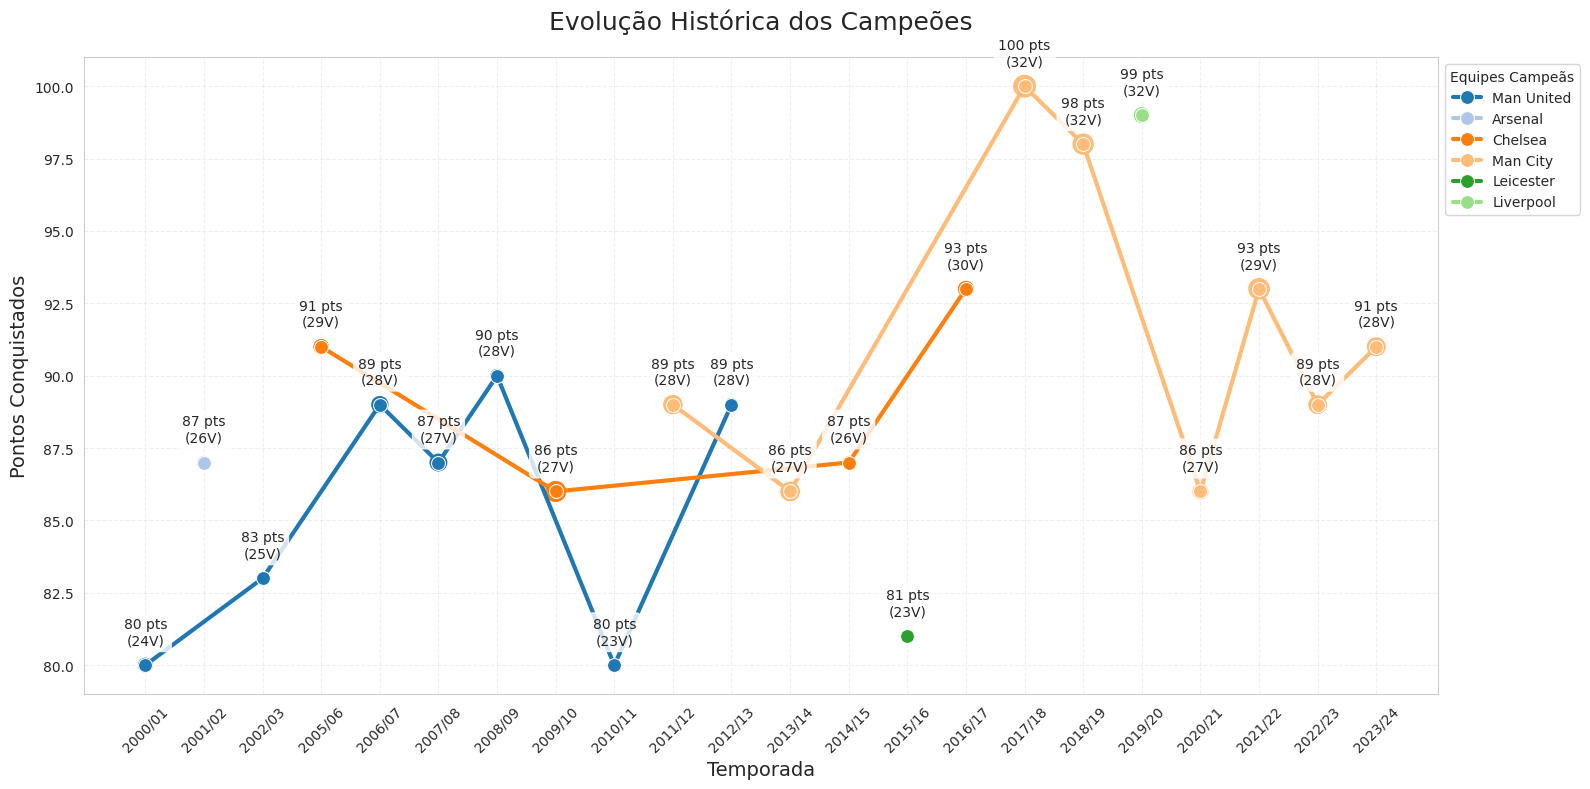

In [210]:
# @title 01) B- Quais foram os campeões?

plt.figure(figsize=(16, 8))
sns.set_palette("tab20")
sns.set_style("whitegrid")


ax = sns.lineplot(
    data=campeoes,
    x='Season',
    y='Points',
    hue='Team',
    marker='o',
    markersize=10,
    linewidth=3
)

sns.scatterplot(
    data=campeoes,
    x='Season',
    y='Points',
    hue='Team',
    size='GoalDifference',
    sizes=(50, 300),
    legend=False,
    ax=ax
)

for i, row in campeoes.iterrows():
    plt.annotate(
        f"{row['Points']} pts\n({row['Win']}V)",
        (row['Season'], row['Points']),
        xytext=(0, 15),
        textcoords='offset points',
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
    )

plt.title("Evolução Histórica dos Campeões", fontsize=18, pad=20)
plt.xlabel("Temporada", fontsize=14)
plt.ylabel("Pontos Conquistados", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title="Equipes Campeãs", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [211]:
#@title 2) A- Quantos títulos por campeão?
qtd_titulos_campeos

,Season,Points
Team,,
Man City,8,8
Man United,7,7
Chelsea,4,4
Arsenal,1,1
Liverpool,1,1
Leicester,1,1


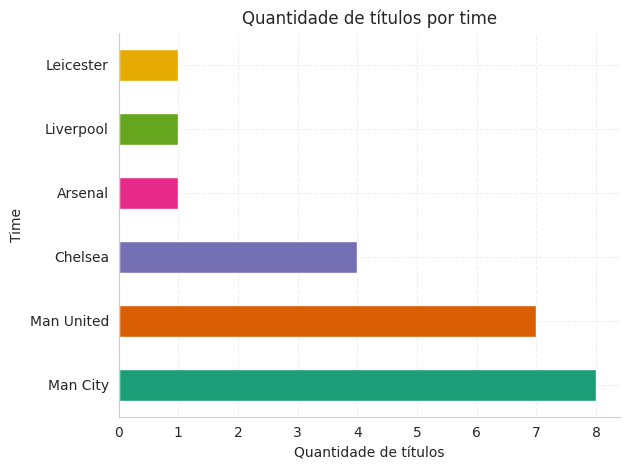

In [212]:
#@title 2) B- Quantos títulos por campeão?

qtd_titulos_campeos['Season'].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Quantidade de títulos')
plt.ylabel('Time')
plt.title('Quantidade de títulos por time')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

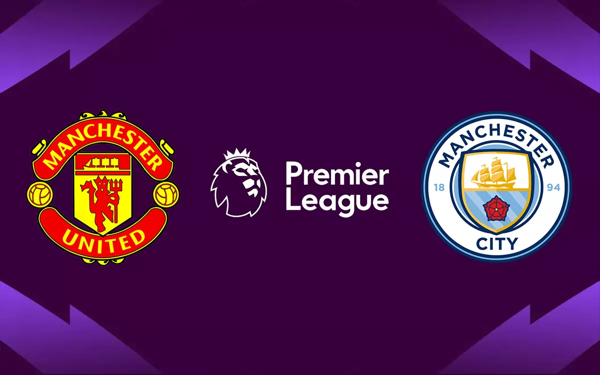

In [213]:
# @title disputa dos campeos
import requests
from io import BytesIO

image_url = "https://www.mundoconectado.com.br/wp-content/uploads/2023/10/Manchester-United-x-Manchester-City-pela-Premier-League-2023-24-onde-assistir-ao-vivo.jpg"

response = requests.get(image_url)

if response.status_code == 200:
    imagem2 = Image.open(BytesIO(response.content))

    novo_tamanho = (imagem2.width // 2, imagem2.height // 2)
    if novo_tamanho[0] > 0 and novo_tamanho[1] > 0:

        imagem_redimensionada = imagem2.resize(novo_tamanho)
        imagem_redimensionada.save("imagem_redimensionada.jpg")
    else:
        print("As novas dimensões resultaram em um tamanho inválido (<= 0). Não foi possível redimensionar.")
else:
    print(f"Falha ao baixar a imagem. Status code: {response.status_code}")
imagem_redimensionada

In [214]:
#@title 3) Quais foram os melhores campeões?
campeoes.sort_values(by=["Points","GoalsScored"], ascending=False)[["Season","Team","Points","GoalsScored"]]

,Season,Team,Points,GoalsScored
15,2017/18,Man City,100,106
17,2019/20,Liverpool,99,85
16,2018/19,Man City,98,95
19,2021/22,Man City,93,99
14,2016/17,Chelsea,93,85
21,2023/24,Man City,91,96
3,2005/06,Chelsea,91,72
6,2008/09,Man United,90,68
20,2022/23,Man City,89,94
9,2011/12,Man City,89,93


In [215]:
#@title 4) Quais foram os piores campeões?
campeoes.sort_values(by=["Points","GoalsScored"])[["Season","Team","Points","GoalsScored"]]

,Season,Team,Points,GoalsScored
8,2010/11,Man United,80,78
0,2000/01,Man United,80,79
13,2015/16,Leicester,81,68
2,2002/03,Man United,83,74
18,2020/21,Man City,86,83
11,2013/14,Man City,86,102
7,2009/10,Chelsea,86,103
12,2014/15,Chelsea,87,73
1,2001/02,Arsenal,87,79
5,2007/08,Man United,87,80


In [216]:
# @title 5) A- Quantas partidas por temporada tiveram mudança de resultado, ou seja, houve alteração de resultado após o intervalo do jogo?
for season, count in viradas_por_temporada.items():
    print(f"Temporada: {season}, Partidas com Mudança de Resultado: {count}")
    print("-" * 20)

#viradas_por_temporada (CASO QUEIRA VER COMO DATAFRAME)


Temporada: 2000/01, Partidas com Mudança de Resultado: 157
--------------------
Temporada: 2001/02, Partidas com Mudança de Resultado: 144
--------------------
Temporada: 2002/03, Partidas com Mudança de Resultado: 162
--------------------
Temporada: 2005/06, Partidas com Mudança de Resultado: 142
--------------------
Temporada: 2006/07, Partidas com Mudança de Resultado: 150
--------------------
Temporada: 2007/08, Partidas com Mudança de Resultado: 149
--------------------
Temporada: 2008/09, Partidas com Mudança de Resultado: 160
--------------------
Temporada: 2009/10, Partidas com Mudança de Resultado: 136
--------------------
Temporada: 2010/11, Partidas com Mudança de Resultado: 139
--------------------
Temporada: 2011/12, Partidas com Mudança de Resultado: 152
--------------------
Temporada: 2012/13, Partidas com Mudança de Resultado: 153
--------------------
Temporada: 2013/14, Partidas com Mudança de Resultado: 159
--------------------
Temporada: 2014/15, Partidas com Mudança

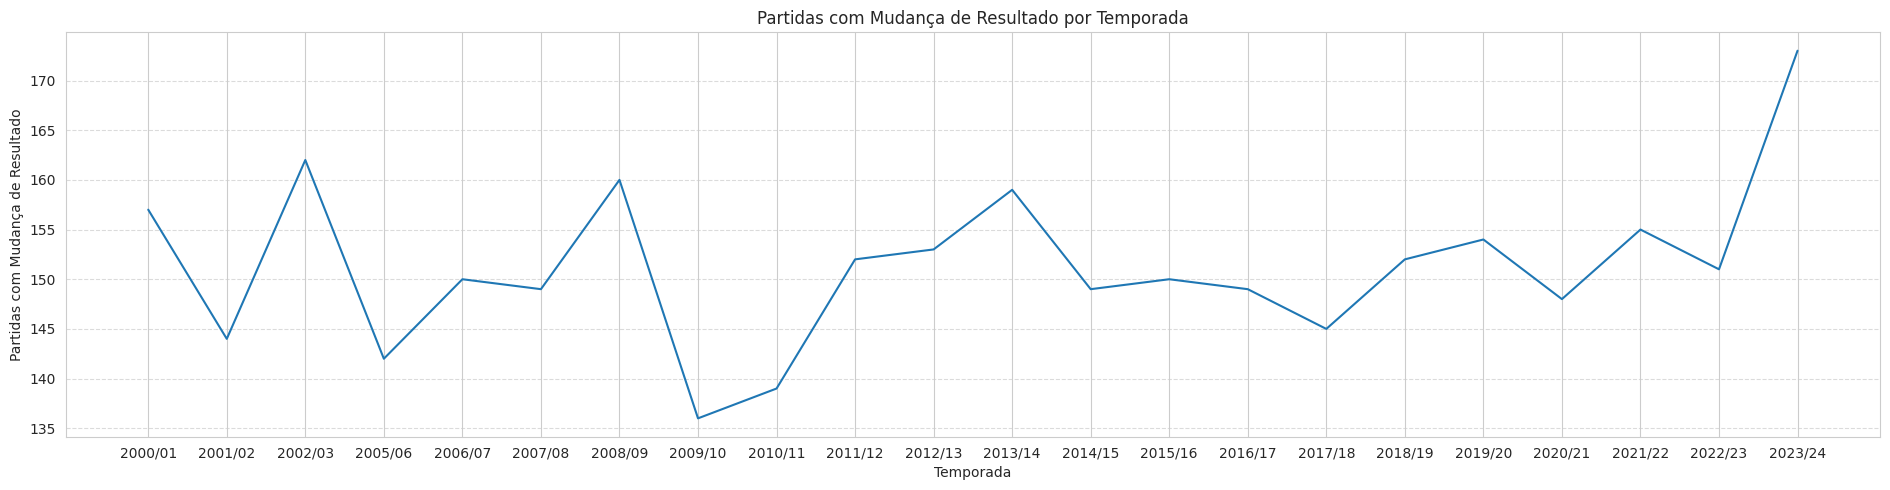

In [217]:
# @title 5) B- Quantas partidas por temporada tiveram mudança de resultado, ou seja, houve alteração de resultado após o intervalo do jogo?
plt.figure(figsize=(19,5))
plt.plot(viradas_por_temporada.index, viradas_por_temporada)
plt.xlabel('Temporada')
plt.ylabel('Partidas com Mudança de Resultado')
plt.title('Partidas com Mudança de Resultado por Temporada')
plt.grid(True,axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [218]:
# @title 6) A- Temporadas mais acirradas?  Relação de gols Mandantes vs Visitantes:
gols

,Season,FullTimeHomeGoals,FullTimeAwayGoals,Diferenca
0,2000/01,587,405,182
1,2001/02,557,444,113
2,2002/03,570,430,140
3,2005/06,555,389,166
4,2006/07,552,379,173
5,2007/08,581,421,160
6,2008/09,532,410,122
7,2009/10,645,408,237
8,2010/11,617,446,171
9,2011/12,604,462,142


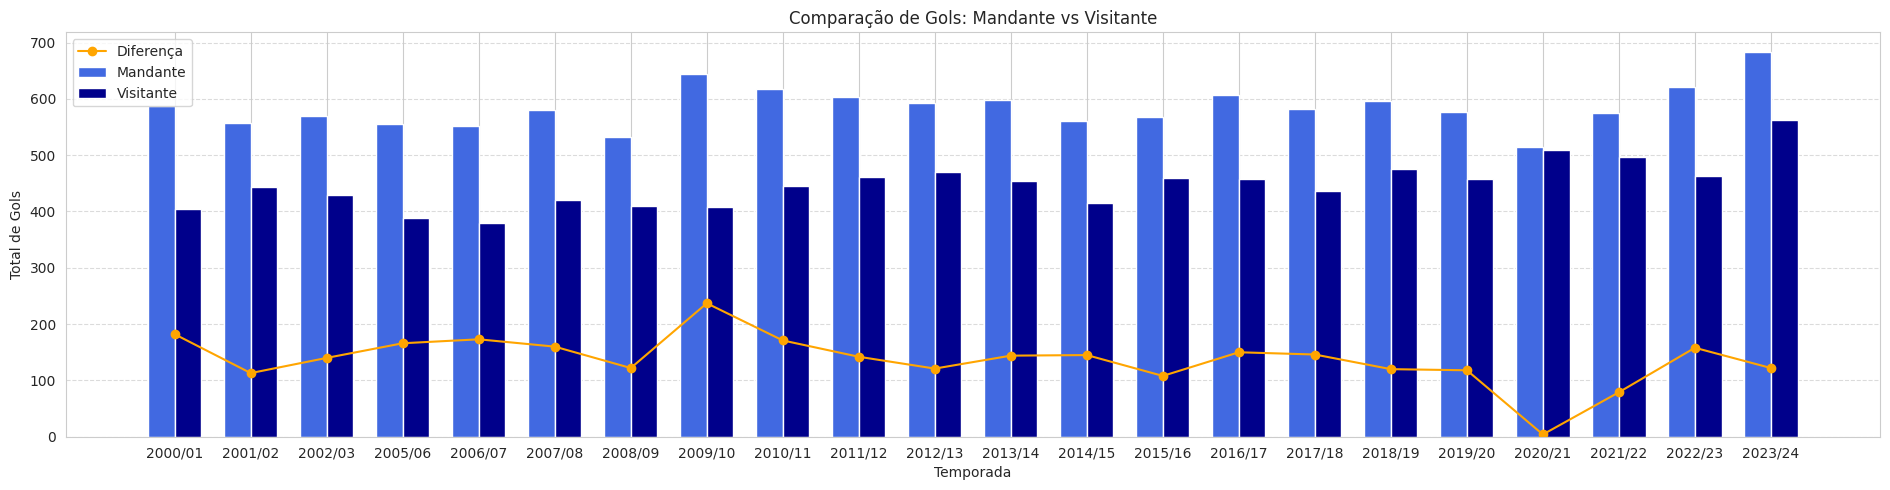

In [219]:
# @title 6) B- Temporadas mais acirradas?  Relação de gols Mandantes vs Visitantes:
plt.figure(figsize=(19,5))

largura_da_barra = 0.35
indice = range(len(gols))

plt.bar(indice, gols['FullTimeHomeGoals'], largura_da_barra, label='Mandante', color='royalblue')
plt.bar([i + largura_da_barra for i in indice], gols['FullTimeAwayGoals'], largura_da_barra, label='Visitante', color='darkblue')
plt.plot([i + largura_da_barra/2 for i in indice], gols['Diferenca'], 'o-', color='orange', label='Diferença')
plt.xlabel('Temporada')
plt.ylabel('Total de Gols')
plt.title('Comparação de Gols: Mandante vs Visitante')
plt.xticks([i + largura_da_barra/2 for i in indice], gols['Season'])
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [220]:
# @title 7) A- Temporadas mais acirradas?  Relação de gols por temporada:
gols_por_temporada.sort_values(by='TotalGols', ascending=False)

,FullTimeHomeGoals,FullTimeAwayGoals,TotalGols,media_FullTimeHomeGoals,media_FullTimeAwayGoals,media_TotalGols
Season,,,,,,
2023/24,684,562,1246,1.800000,1.478947,1.639474
2022/23,621,463,1084,1.634211,1.218421,1.426316
2018/19,596,476,1072,1.568421,1.252632,1.410526
2021/22,575,496,1071,1.513158,1.305263,1.409211
2011/12,604,462,1066,1.589474,1.215789,1.402632
2016/17,607,457,1064,1.597368,1.202632,1.400000
2012/13,592,471,1063,1.557895,1.239474,1.398684
2010/11,617,446,1063,1.623684,1.173684,1.398684
2009/10,645,408,1053,1.697368,1.073684,1.385526


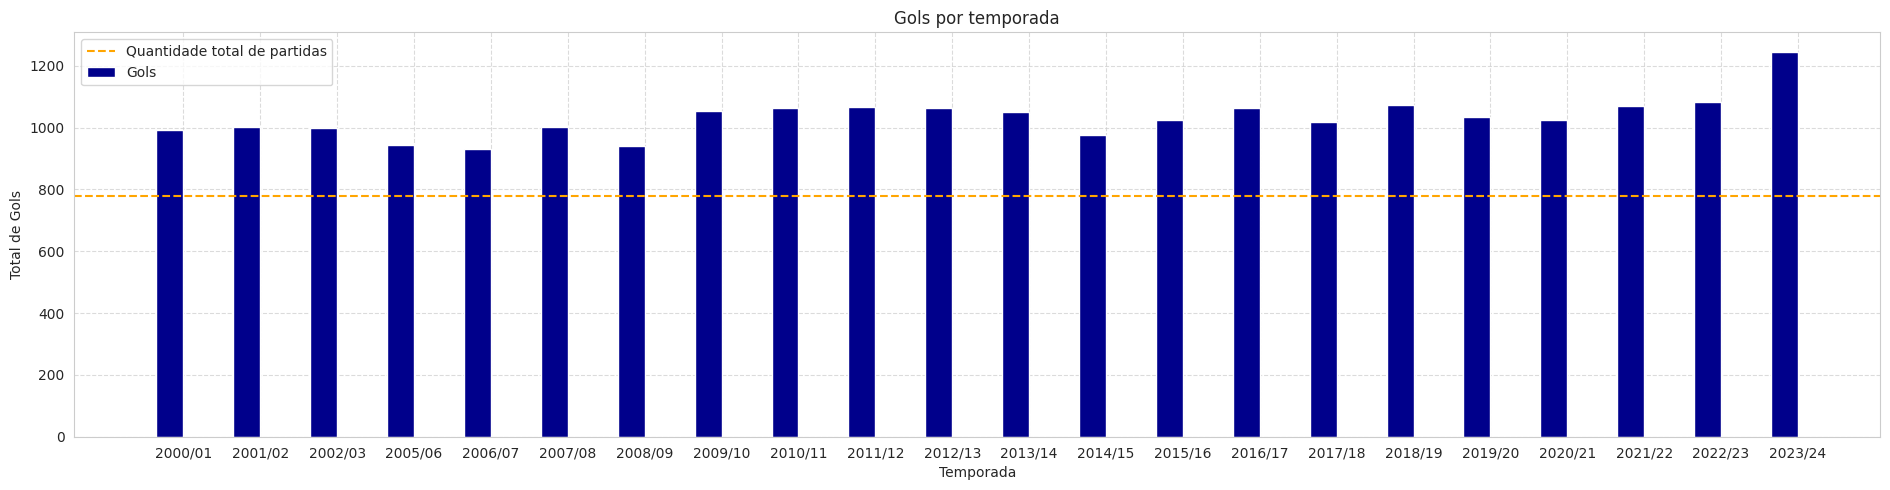

In [221]:
# @title 7) B- Temporadas mais acirradas?  Relação de gols por temporada:
plt.figure(figsize=(19,5))
largura_da_barra2 = 0.35
indice2 = range(len(gols_por_temporada))
plt.bar(indice, gols_por_temporada['TotalGols'], largura_da_barra, label='Gols', color='darkblue')
plt.xlabel('Temporada')
plt.ylabel('Total de Gols')
plt.title('Gols por temporada')
plt.axhline(y=780, color='orange', linestyle='--', label='Quantidade total de partidas')
plt.xticks([i + largura_da_barra/2 for i in indice], gols_por_temporada.index)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

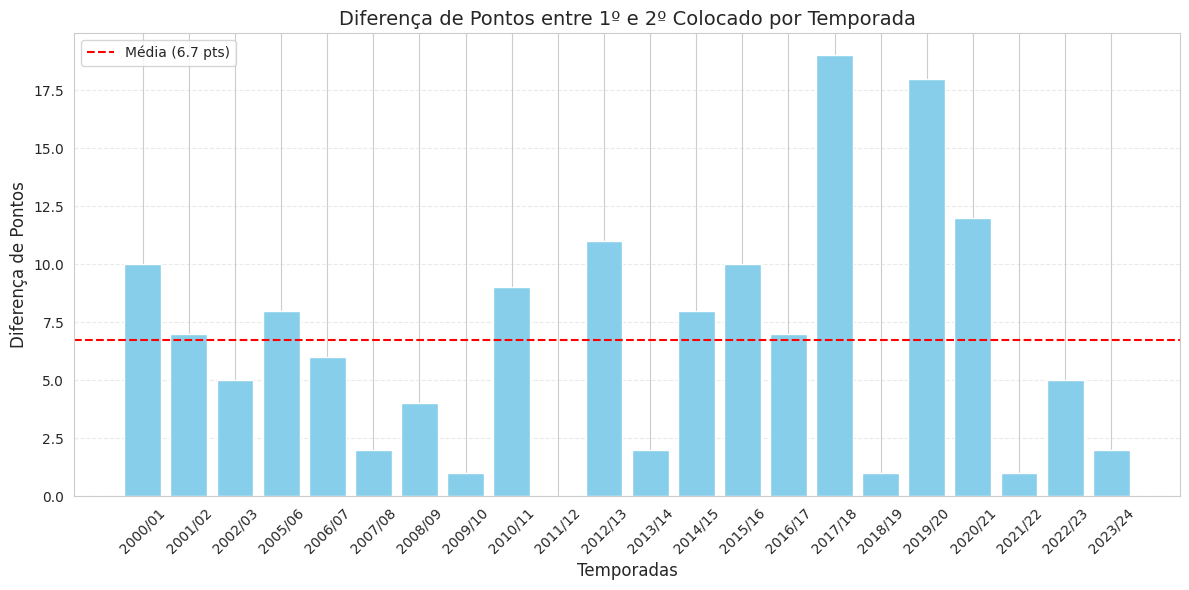

In [222]:
# @title 8) Temporada mais acirrada entre o campeão e o vice campeão
primeiros = (pontos_por_time_temporada
             [pontos_por_time_temporada['Posicao'] == 1]
             .set_index('Season')['Points'])
segundos = (pontos_por_time_temporada
            [pontos_por_time_temporada['Posicao'] == 2]
            .set_index('Season')['Points'])
diferenca_pontos = (primeiros - segundos).reset_index(name='DiferençaPontos')
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(diferenca_pontos['Season'].astype(str), diferenca_pontos['DiferençaPontos'], color='skyblue')
plt.axhline(y=diferenca_pontos['DiferençaPontos'].mean(), color='r', linestyle='--', label=f'Média ({diferenca_pontos["DiferençaPontos"].mean():.1f} pts)')
plt.title('Diferença de Pontos entre 1º e 2º Colocado por Temporada', fontsize=14)
plt.xlabel('Temporadas', fontsize=12)
plt.ylabel('Diferença de Pontos', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


A Interação a seguir, vale a pena para não só validar os dados apresentados como curiosidade sobre as temporadas, pois apresenta todas as tabelas do dataset tratado.

In [223]:
# @title INTERAÇÃO PARA CURIOSIDADE
print("Escolha uma temporada: \n")
temporada = input().strip()
print(f"\nTemporada escolhida: {temporada}")
print('\n')
pontos_por_time_temporada_selecao = pontos_por_time_temporada[
    pontos_por_time_temporada['Season'] == temporada
]

pontos_por_time_temporada_selecao = pontos_por_time_temporada_selecao.reset_index(drop=True)
pontos_por_time_temporada_selecao


Escolha uma temporada: 

2011/12

Temporada escolhida: 2011/12




,Season,Team,Points,Match,Win,Draw,Loss,GoalsScored,GoalsConceded,GoalDifference,Posicao
0,2011/12,Man City,89,38,28,5,5,93,29,64,1
1,2011/12,Man United,89,38,28,5,5,89,33,56,2
2,2011/12,Arsenal,70,38,21,7,10,74,49,25,3
3,2011/12,Tottenham,69,38,20,9,9,66,41,25,4
4,2011/12,Newcastle,65,38,19,8,11,56,51,5,5
5,2011/12,Chelsea,64,38,18,10,10,65,46,19,6
6,2011/12,Everton,56,38,15,11,12,50,40,10,7
7,2011/12,Liverpool,52,38,14,10,14,47,40,7,8
8,2011/12,Fulham,52,38,14,10,14,48,51,-3,9
9,2011/12,West Brom,47,38,13,8,17,45,52,-7,10


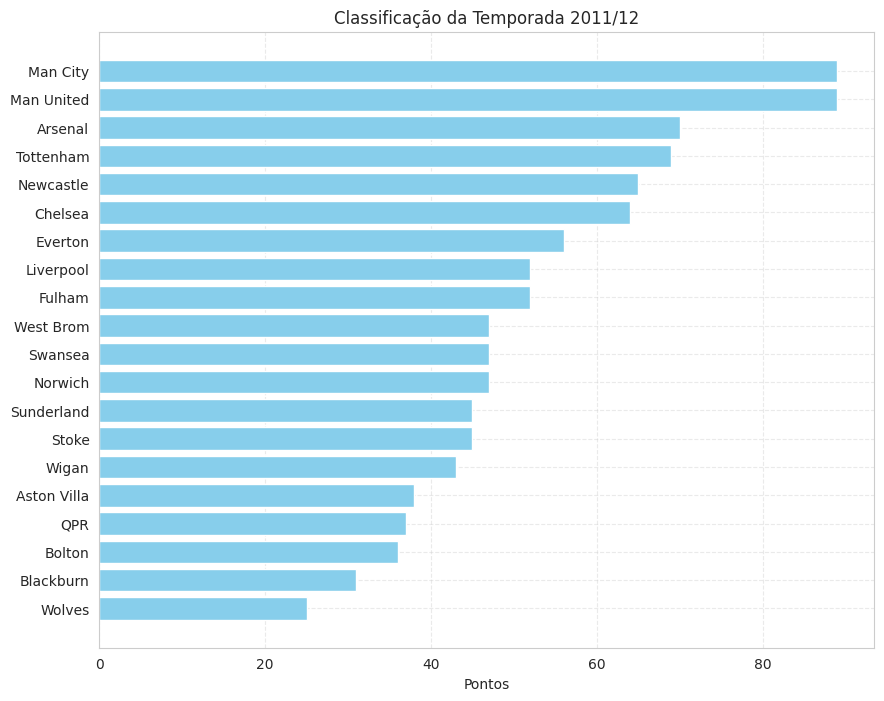

In [224]:
#@title Executar para gerar gráfico da pontuação dos times
pontos_por_time_temporada_selecao.sort_values('Points', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(pontos_por_time_temporada_selecao['Team'], pontos_por_time_temporada_selecao['Points'], color='skyblue')
plt.xlabel('Pontos')
plt.title(f'Classificação da Temporada {temporada}')
plt.grid(linestyle='--', alpha=0.4)
plt.gca().invert_yaxis()
plt.show()